## Data Exploration and preprocessing for clustering
Top part of the file is initial read in and exploration of data.   
Then, the code preprocesses the data for clustering. (code was coppied from this file into megans notebook for final running).  


We initially did more preprocessing than was necessary for our clustering task.  
The final, trimmed down version of preprocessing starts at the "final version of preprocessing" heading  
we decided not to use the lemmatized data in the end.    

### Read In Data

In [1]:
import json
import pandas as pd
import re
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#from transformers import AutoTokenizer #kills my kernal

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


/var/folders/z3/7313_vxj6t1cpgcl_20j69cm0000gn/T/ipykernel_9890/3376704910.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jackieglasheen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jackieglasheen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jackieglasheen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

punctuation
stop word
limit to first X words
append tilile
lematize

In [20]:
path = '../data/articles.json'

# Read the JSON file
with open(path, 'r') as file:
    data = json.load(file)



In [21]:
# Print a sample of data
num_rows= 2  
for i in range(num_rows):
    print(data[i])



{'title': '\n\t\tTrump DC hotel falls millions short of projected revenue in first months\t', 'article_text': 'President Trump’s Washington, D.C., hotel made at least $2 million less than projected in its first two months of operation, according to House Democrats citing documents obtained from the General Services Administration (GSA).Democrats on the House Oversight and Transportation committees revealed the information in a letter sent Monday to GSA Administrator Timothy Horne, in which they asked how the agency planned to handle the alleged breach of the lease on the hotel housed in the Old Post Office, just east of the White House on Pennsylvania Avenue.A provision in the lease, signed years before Trump began his presidential campaign, prevents any federal elected official from being included on or benefiting from the lease. The Democrats claim in their letter that Trump’s ascendance to the presidency on Friday is a breach of the lease.The documents Democrats obtained from the GS

In [22]:
#development sample
data_sample = data[0:300]

with open("../data/300_sample_articles.json", "w") as fp:
    json.dump(data_sample , fp) 

# Reading data sample

In [23]:
with open("../data/300_sample_articles.json", "r") as fp:
    data_sample = json.load(fp)

In [24]:
for article in data_sample:
    for key in article:
        print(key)
    break

title
article_text
images
uuid
parent


In [25]:
data_sample[20].keys()

dict_keys(['title', 'article_text', 'images', 'uuid', 'parent'])

Looks like we could either grab sourse from image url main or imag url social

In [26]:
for sample in data_sample:
    #print(sample["images"])
    for url_item in sample["images"]:
        print(url_item["image_type"], url_item["url"])
    break



main https://i0.wp.com/thehill.com/wp-content/uploads/sites/2/2017/01/trumphotel618289268.jpg?w=2000&ssl=1
social https://thehill.com/wp-content/uploads/sites/2/2017/01/trumphotel618289268.jpg?w=1280


# Experimenting with preprocessing

In [27]:
# isolate the article text 
#text_only = []
#for article in data_sample:
#    text_only.append(article["article_text"])


In [28]:
json_string = json.dumps(data_sample)
df = pd.read_json(json_string)
df.head()

/var/folders/z3/7313_vxj6t1cpgcl_20j69cm0000gn/T/ipykernel_9890/3507971266.py:2: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(json_string)


,title,article_text,images,uuid,parent
0,\n\t\tTrump DC hotel falls millions short of p...,"President Trump’s Washington, D.C., hotel made...",[{'url': 'https://i0.wp.com/thehill.com/wp-con...,73ff4208-406e-11ee-a96e-33dec8f414a2,73ff4208-406e-11ee-a96e-33dec8f414a2
1,\n\t\tOvernight Tech: Microsoft wants end to f...,MICROSOFT CALLS OUT GOVERNMENT HACKING PRACTIC...,[{'url': 'https://i0.wp.com/thehill.com/wp-con...,77a0c19b-406e-11ee-a96e-33dec8f414a2,77a0c19b-406e-11ee-a96e-33dec8f414a2
2,\n\t\tAnother US motorcycle company considerin...,Minnesota-based Polaris acknowledged on Friday...,[{'url': 'https://thehill.com/wp-content/uploa...,8cfe90c9-406e-11ee-a96e-33dec8f414a2,8cfe90c9-406e-11ee-a96e-33dec8f414a2
3,\n\t\tTrump: ‘I don’t need a summit’ with Mexi...,President Trump said he does not need to hold ...,[{'url': 'https://i0.wp.com/thehill.com/wp-con...,9cdbdae6-406e-11ee-a96e-33dec8f414a2,9cdbdae6-406e-11ee-a96e-33dec8f414a2
4,\n\t\tUS calls emergency meeting of UN nuclear...,The United States called an emergency meeting ...,[{'url': 'https://thehill.com/wp-content/uploa...,a3a5f190-406e-11ee-a96e-33dec8f414a2,a3a5f190-406e-11ee-a96e-33dec8f414a2


# Preprocessing

In [29]:
#concate text and title
df["title_text"] = df["title"] + " " +  df["article_text"]

In [30]:

#lowercase text
df['title_text'] = df['title_text'].str.lower()

# remove some unicode, for tabs and newline and return. 
# are there others?
df['title_text'] = df['title_text'].apply(lambda x: re.sub(r'[\n\t\r]', '', x))

# remove punctuation, replace with space
df['title_text'] = df['title_text'].apply(lambda x: re.sub(r'[^\w\s]', ' ', x))

In [31]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'it', 'itself', 'here', 'this', 'shan', "couldn't", 'themselves', 'and', "won't", 'when', 'more', 'in', 'nor', 'at', 'yourself', 'my', 'against', 'that', 'those', 'mustn', 'up', 'o', 'their', 'wasn', 'than', 'him', "you're", "aren't", 'were', 'shouldn', 'whom', 'ain', "doesn't", 'once', "weren't", 'such', 's', "shan't", "shouldn't", 'just', 'ma', 'our', "mightn't", 'ourselves', 'same', 'through', 'haven', 'hadn', 'while', 'from', 'm', 'i', 'before', 'off', 'now', 'of', 'its', 'are', 'being', 'with', 'but', 'what', "mustn't", 'too', "hadn't", 'don', 'to', 'we', 'd', 'very', 'over', 'into', 'be', 'how', 'have', 'you', 'as', "don't", "wasn't", 'was', 'she', 'because', 'where', 'couldn', "you'd", 'theirs', "it's", 'has', 'why', 'a', "should've", 'ours', 'been', 'll', "hasn't", 'wouldn', 'had', 'yours', 're', 'can', 'will', 'didn', 'they', 'needn', 'again', 'himself', 'herself', 'which', 'any', 've', 'if', 'weren', "wouldn't", 'both', 'yourselves', 'hers', 'the', 'between', 'her', 'during'

In [32]:
len(stop_words)

179

In [33]:

def remove_stopwords_and_lemmatize(text):
    """
    removes stopwords and lemmatizes data
    """
    
    word_tokens = word_tokenize(text)  
    removed_stopword = [word for word in word_tokens if word not in stop_words]  

    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(token) for token in removed_stopword]
    
    return ' '.join(lemmatized_text[:50])

df['title_text'] = df['title_text'].apply(remove_stopwords_and_lemmatize)


In [34]:
# remove extra spaces
df['title_text_clean'] = df['title_text'].str.replace(r'\s+', ' ', regex=True)

In [35]:
df['title_text_clean'].head()
# US--> U?

0    trump dc hotel fall million short projected re...
1    overnight tech microsoft want end fed secret h...
2    another u motorcycle company considering movin...
3    trump need summit mexico el salvador guatemala...
4    u call emergency meeting un nuclear watchdog g...
Name: title_text_clean, dtype: object

In [36]:
#cleaned sample

#selected_columns = df[['title', 'text', 'title_text_clean']]
df[['title', 'article_text', 'title_text_clean']].to_csv("../data/30_sample_articles_cleaned.csv", index=False)

In [ ]:
# Create Embedded tokens 

#tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
#tokenized_texts = df['title_text_token'].apply(lambda x: tokenizer.tokenize(x))


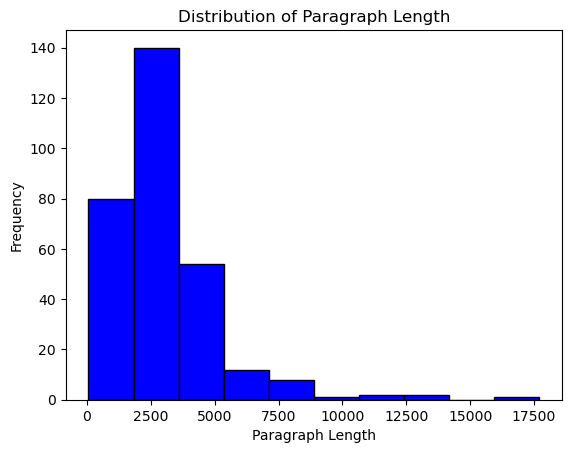

In [41]:
#Draft code looking into paragraph lengths

# make var with first paragraph only
df['first_paragraph'] = df["article_text"].str.split('\n').str[0]

df['paragraph_length'] = df['first_paragraph'].str.len()
df['text_len'] = df['article_text'].str.len()

#bin_break_points = [0, 100, 200, 300, 400, 500, 600, 700]

plt.hist(df['paragraph_length'],  color='blue', edgecolor='black')  #bins = bin_break_points,
plt.xlabel('Paragraph Length')
plt.ylabel('Frequency')
plt.title('Distribution of Paragraph Length')
plt.show()

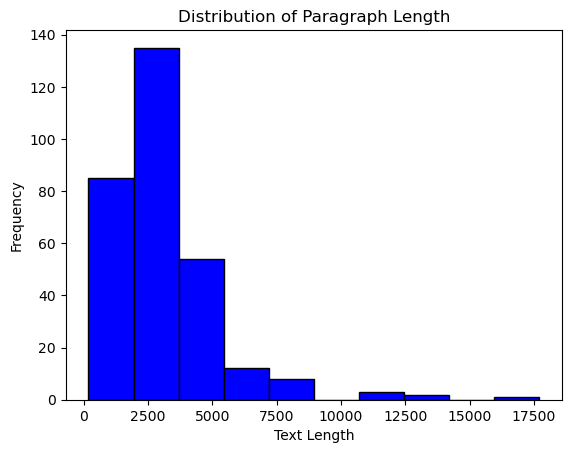

In [42]:
##compare to full length
plt.hist(df['text_len'],  color='blue', edgecolor='black')  #bins = bin_break_points,
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Paragraph Length')
plt.show()

in comparing real articles found online to our jsons, it looks like whatever was used to make new lines is not in our json — there are paragraphs in the real article, but nothing indicates new line in the json (there is no space either where there should be a paragraph indicator — maybe some cleaning of the raw scrapes removed the unicode characters?

In [ ]:
#draft code for fixing unicode encodings-

# # removing unicode characters (and replaceing with corresponding punctuation)
# def decode_unicode(text):
#     return text.encode().decode('unicode_escape')



df['test'] = df['article_text'].apply(lambda x: decode_unicode(x))

# Final Version of Preprocessing

Per Guidance from Amitabh and TAs, text preprocessing will only involve appenfing title to text, keeping certain number of words, and creating embeddings.

Ran megans cleaning notebook to use the cleaned data as the starting point for the analysis

In [81]:
import chardet

with open("../data/300_sample_articles.json", 'rb') as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [87]:
with open("../data/300_sample_articles.json", "r") as fp:
    data_sample = json.load(fp)

json_string = json.dumps(data_sample)
json_string[:512]

'[{"title": "\\n\\t\\tTrump DC hotel falls millions short of projected revenue in first months\\t", "article_text": "President Trump\\u2019s Washington, D.C., hotel made at least $2 million less than projected in its first two months of operation, according to House Democrats citing documents obtained from the General Services Administration (GSA).Democrats on the House Oversight and Transportation committees revealed the information in a letter sent Monday to GSA Administrator Timothy Horne, in which they asked '

In [95]:
df = pd.read_json(json_string)
#df = pd.read_json(json_string, encoding=result['encoding'])
df.head()

/var/folders/z3/7313_vxj6t1cpgcl_20j69cm0000gn/T/ipykernel_9890/592623837.py:2: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(json_string, encoding=result['encoding'])


,title,article_text,images,uuid,parent
0,\n\t\tTrump DC hotel falls millions short of p...,"President Trump’s Washington, D.C., hotel made...",[{'url': 'https://i0.wp.com/thehill.com/wp-con...,73ff4208-406e-11ee-a96e-33dec8f414a2,73ff4208-406e-11ee-a96e-33dec8f414a2
1,\n\t\tOvernight Tech: Microsoft wants end to f...,MICROSOFT CALLS OUT GOVERNMENT HACKING PRACTIC...,[{'url': 'https://i0.wp.com/thehill.com/wp-con...,77a0c19b-406e-11ee-a96e-33dec8f414a2,77a0c19b-406e-11ee-a96e-33dec8f414a2
2,\n\t\tAnother US motorcycle company considerin...,Minnesota-based Polaris acknowledged on Friday...,[{'url': 'https://thehill.com/wp-content/uploa...,8cfe90c9-406e-11ee-a96e-33dec8f414a2,8cfe90c9-406e-11ee-a96e-33dec8f414a2
3,\n\t\tTrump: ‘I don’t need a summit’ with Mexi...,President Trump said he does not need to hold ...,[{'url': 'https://i0.wp.com/thehill.com/wp-con...,9cdbdae6-406e-11ee-a96e-33dec8f414a2,9cdbdae6-406e-11ee-a96e-33dec8f414a2
4,\n\t\tUS calls emergency meeting of UN nuclear...,The United States called an emergency meeting ...,[{'url': 'https://thehill.com/wp-content/uploa...,a3a5f190-406e-11ee-a96e-33dec8f414a2,a3a5f190-406e-11ee-a96e-33dec8f414a2


In [96]:

#lowercase text
df['title'] = df['title'].str.lower()
df['article_text'] = df['article_text'].str.lower()

#remove certain characters from title
df['title'] = df['title'].apply(lambda x: re.sub(r'[\n\t\r]', '', x))

df.head()


,title,article_text,images,uuid,parent
0,trump dc hotel falls millions short of project...,"president trump’s washington, d.c., hotel made...",[{'url': 'https://i0.wp.com/thehill.com/wp-con...,73ff4208-406e-11ee-a96e-33dec8f414a2,73ff4208-406e-11ee-a96e-33dec8f414a2
1,overnight tech: microsoft wants end to feds’ s...,microsoft calls out government hacking practic...,[{'url': 'https://i0.wp.com/thehill.com/wp-con...,77a0c19b-406e-11ee-a96e-33dec8f414a2,77a0c19b-406e-11ee-a96e-33dec8f414a2
2,another us motorcycle company considering movi...,minnesota-based polaris acknowledged on friday...,[{'url': 'https://thehill.com/wp-content/uploa...,8cfe90c9-406e-11ee-a96e-33dec8f414a2,8cfe90c9-406e-11ee-a96e-33dec8f414a2
3,"trump: ‘i don’t need a summit’ with mexico, el...",president trump said he does not need to hold ...,[{'url': 'https://i0.wp.com/thehill.com/wp-con...,9cdbdae6-406e-11ee-a96e-33dec8f414a2,9cdbdae6-406e-11ee-a96e-33dec8f414a2
4,us calls emergency meeting of un nuclear watch...,the united states called an emergency meeting ...,[{'url': 'https://thehill.com/wp-content/uploa...,a3a5f190-406e-11ee-a96e-33dec8f414a2,a3a5f190-406e-11ee-a96e-33dec8f414a2


In [97]:
print(df['article_text'][0])
df['title'][0]

president trump’s washington, d.c., hotel made at least $2 million less than projected in its first two months of operation, according to house democrats citing documents obtained from the general services administration (gsa).democrats on the house oversight and transportation committees revealed the information in a letter sent monday to gsa administrator timothy horne, in which they asked how the agency planned to handle the alleged breach of the lease on the hotel housed in the old post office, just east of the white house on pennsylvania avenue.a provision in the lease, signed years before trump began his presidential campaign, prevents any federal elected official from being included on or benefiting from the lease. the democrats claim in their letter that trump’s ascendance to the presidency on friday is a breach of the lease.the documents democrats obtained from the gsa and released monday show that trump has a 76.7 percent stake in the hotel. the hotel has been a constant sour

'trump dc hotel falls millions short of projected revenue in first months'

In [98]:
# Combining and/or Subsetting the data for training

# concate text and title
df["title_text"] = df["title"] + " " +  df["article_text"]
df["title_text_limited"] = df["title_text"][:512]

df["text_limited"] = df['article_text'][:512]



In [99]:

def lemmatize(text):
    """
    lmmatizes the data, then rejoins it to a single string
    """
    
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(text)  
    lemmatized_text = [lemmatizer.lemmatize(token) for token in word_tokens]
    
    return ' '.join(lemmatized_text)

    # Efficiency concern? we tokenize to lemmatize, and then re-join into a string. 
    # Embeddings should be created in the loop?

df['title_text_limited'] = df['title_text_limited'].apply(lemmatize)
df['text_limited'] = df['text_limited'].apply(lemmatize)
df['title'] = df['title'].apply(lemmatize)



In [103]:
pd.set_option('display.max_colwidth', None)
df[['title', 'title_text_limited', 'text_limited','article_text']].head(1)

# note -- the lematization and re-joining adds spaces around certian punctuation -- treated they as separate tokens?


,title,title_text_limited,text_limited,article_text
0,trump dc hotel fall million short of projected revenue in first month,"trump dc hotel fall million short of projected revenue in first month president trump ’ s washington , d.c. , hotel made at least $ 2 million le than projected in it first two month of operation , according to house democrat citing document obtained from the general service administration ( gsa ) .democrats on the house oversight and transportation committee revealed the information in a letter sent monday to gsa administrator timothy horne , in which they asked how the agency planned to handle the alleged breach of the lease on the hotel housed in the old post office , just east of the white house on pennsylvania avenue.a provision in the lease , signed year before trump began his presidential campaign , prevents any federal elected official from being included on or benefiting from the lease . the democrat claim in their letter that trump ’ s ascendance to the presidency on friday is a breach of the lease.the document democrat obtained from the gsa and released monday show that trump ha a 76.7 percent stake in the hotel . the hotel ha been a constant source of criticism from democrat and ethic official who warn it could be used by foreign government and business to curry favor with the president . adding to the focus monday wa a lawsuit filed by the left-leaning watchdog group citizen for responsibility and ethic in washington “ to stop president trump from violating the constitution by illegally receiving payment from foreign governments. ” { mosads } “ our hope ha always been that president trump would resolve these breach-of-lease and conflict of interest issue prior to being sworn in a president on january 20 , ” the democrat wrote in their monday letter. “ unfortunately , president trump ha refused to address these concern , and taxpayer dollar may now be squandered a career public servant are forced to take remedial action to cure this breach. ” the letter also includes the trump hotel ’ s revenue versus estimate from september and october 2016 , it first two month of operation.the trump hotel made $ 1,301,000 in revenue in september , though it wa projected to make $ 2,087,000 — meaning it faced a roughly $ 700,000 shortfall . the hotel made $ 2,771,000 in revenue in october , compared to a projected $ 4,276,000 . that ’ s nearly $ 2.3 million le than projected in total.the hotel ’ s net loss for september wa $ 334,000 and $ 825,000 in october . it wa estimated to lose $ 84,000 in september and gain $ 481,000 in profit in october. “ the possibility that president trump will profit from large increase in hotel revenue because he wa elected president highlight the grave concern we have raised for month about his conflict of interest and potential violation of the emolument clause of the constitution , ” wrote the democrat , citing a clause in the constitution barring elected official from receiving gift or payment from foreign governments.the democrat asked horne if the agency would be notifying trump that he violated his lease , and questioned how the gsa plan to deal with the alleged breach and how it would handle claim that the trump organization failed to pay contractor who worked on the hotel.the democrat also asked for copy of correspondence between the gsa and the trump organization and transition team .","president trump ’ s washington , d.c. , hotel made at least $ 2 million le than projected in it first two month of operation , according to house democrat citing document obtained from the general service administration ( gsa ) .democrats on the house oversight and transportation committee revealed the information in a letter sent monday to gsa administrator timothy horne , in which they asked how the agency planned to handle the alleged breach of the lease on the hotel housed in the old post office , just east of the white house on pennsylvania avenue.a provision in the lease , signed ye

In [105]:
#Clean sample
df[['title', 'title_text_limited', 'text_limited']].to_csv("../data/300_sample_articles_cleaned.csv", index=False)